# Práctica - Redes Neuronales con Keras (Parte II)


En esta práctica vamos a ver como implementar en KERAS las nuevas técnicas asociadas al desarrollo de Deep Learning. Concretamente nos referimos a las nuevas funciones de activación ReLu, a la regularización dropout y a la normalización de los datos (Batch normalization).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [7]:
import keras
from keras.utils import to_categorical
from keras import layers

In [8]:
from tensorflow.keras import regularizers
import tensorflow.keras as tk
from sklearn.metrics import roc_auc_score

In [9]:
(x_train, y_train), (x_test, y_test) = tk.datasets.mnist.load_data()

In [ ]:
# normalización, adecuar las matrices con las columnas apropiadas (por ejemplo, 784 en la entrada) ...

## matriz de salida (neuronas de salida)
y_train = to_categorical(y_train, 10)# 10 son el número de clases
y_test = to_categorical(y_test, 10)

## matriz de entrada (neuronas de entrada)
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape(x_test.shape[0], 784)

## normalizar/escalar
x_train = x_train / 255
x_test = x_test / 255

### Sofmax Vs Sigmoide 

**Softmax**: La función de activación softmax es comúnmente utilizada para problemas de clasificación multiclase. Toma un vector de entrada y produce un vector de la misma dimensión con valores que representan las probabilidades de pertenencia a cada clase. La salida de softmax es adecuada cuando las clases son mutuamente excluyentes (un ejemplo solo puede pertenecer a una clase)

**Sigmoide**: La función de activación sigmoide puede ser utilizada en problemas de clasificación binaria. Sin embargo, para problemas de clasificación multiclase, puedes usar la función sigmoide en cada una de las neuronas de salida, tratando cada una como una clasificación binaria independiente. Esto se conoce como "One-vs-All" o "One-vs-Rest". Cada neurona de salida predice la probabilidad de pertenencia a una clase específica frente a todas las demás clases.

<span style="color:red"> Crea dos redes neuronales, una con una función de activación sigmoid en la capa de salida y otra con la función sofmax con la estructura 784-100-50-10 y compara las predicciones de los dos modelos. ¿Qué es lo que sucede en cada caso? </span>.


### Rectified Linear Units (ReLu)


Hasta la revolución del deep learning las funciones de activación típicas eran del tipo sigmoidal. Las ventajas de estas funciones de activación eran:

* Son derivables en todo su dominio.

* Están acotadas entre 0 y 1 (si es logística), o -1 y 1 (si es tangente).

* Existe una combinación lineal de funciones sigmoidales capaz de aproximar cualquier curva (capacidad de aproximación universal).

Sin embargo la derivada de la función sigmoidal toma un valor máximo de 0.25. Esto provoca que a la hora de backpropagar se multiplique por números menores que 1. En esta situación los gradientes con respecto a los pesos de cada capa van tendiendo a 0 y por lo tanto hay una pérdida de información que es mayor cuantas más capas haya en la red (desvanecimiento de gradiente).

Para evitar el desvanecimiento de gradiente, lo ideal sería que la derivada fuese 1 para que no hubiese pérdida de información. Por este motivo surgieron las funciones de activación ReLu, cuyas ventajas son:

* Son derivables en todo su dominio salvo en el punto x = 0.

* La derivada es o 1 o 0. Por tanto, rapidez en el cálculo de los gradientes.

* Disminuyen el efecto del desvanecimiento de gradiente y por tanto permiten poner varias capas.

<span style="color:red">  En el siguiente el alumno deberá crear dos redes neuronales: una con función de activación sigmoidal y otra con ReLu (en todas las capas) con la estructura 784-500-500-500-500-10 y la función de pérdida 'mse'. Entrena el modelo 20 épocas y observa el fenómeno del desvanecimiento de gradiente. </span>

## Dropout

Deep learning conlleva la presencia de muchos parámetros en la red. La gran cantida de parámetros puede desembocar en un problema de sobreajuste. Para lidiar con este problema se ha desarrollado una técnica de regularización conocida como dropout (más información en https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf). Para implantarla en KERAS hay que utilizar la función “layers.Dropout(rate = 0.5)”, donde rate es la probabilidad de que una neurona continúe en la red o no durante la época de entrenamiento. En el siguiente código se indica como regularizar con dropout:

In [11]:
model3 = keras.Sequential()
model3.add(layers.Dense(units = 500, input_dim = 784, activation = "relu")) # Primera capa oculta
model3.add(layers.Dropout(rate = 0.5))
model3.add(layers.Dense(units = 500, activation = "relu")) 
model3.add(layers.Dropout(rate = 0.5))
model3.add(layers.Dense(units = 500 , activation = "relu")) 
model3.add(layers.Dropout(rate = 0.5))
model3.add(layers.Dense(units = 500 , activation = "relu")) 
model3.add(layers.Dropout(rate = 0.5))
model3.add(layers.Dense(units = 10 , activation = "sigmoid")) 

model3.compile(
  optimizer = keras.optimizers.SGD(0.1),
  loss = "mse",
  metrics = ["accuracy"]
)

history3 = model3.fit(x_train, y_train, epochs = 20, batch_size = 100, validation_split = 0.2)

Epoch 1/20


/Users/claudiavello/.pyenv/versions/machinelearning1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1074 - loss: 0.1175 - val_accuracy: 0.2240 - val_loss: 0.0896
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1432 - loss: 0.0923 - val_accuracy: 0.4392 - val_loss: 0.0872
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2032 - loss: 0.0898 - val_accuracy: 0.5443 - val_loss: 0.0816
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2773 - loss: 0.0852 - val_accuracy: 0.5687 - val_loss: 0.0726
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3685 - loss: 0.0775 - val_accuracy: 0.6241 - val_loss: 0.0640
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4548 - loss: 0.0702 - val_accuracy: 0.6666 - val_loss: 0.0558
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5345 - loss: 0.0626 - val_accuracy: 0.7254 - val_loss: 0.0494
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5996 - loss: 0.0557 - val_accuracy: 0.7699 - val_

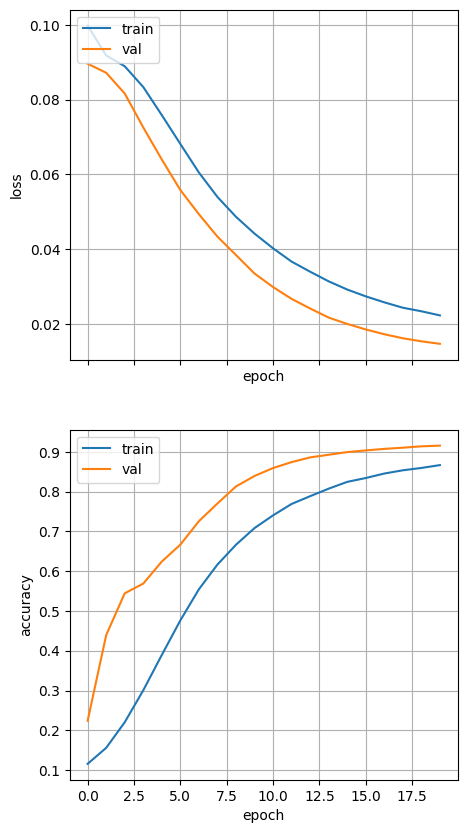

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=False, figsize = (5, 10))

ax1.plot(history3.history['loss'])
ax1.plot(history3.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid(True)

ax2.plot(history3.history['accuracy'])
ax2.plot(history3.history['val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
ax2.grid(True)

Si hubiésemos querido aplicar dropout a la capa de entrada habría que haber definido el modelo de la manera siguiente. En el siguiente ejemplo, además, vamos a diseñar un autoencoder. El objetivo es doble: 1) aprender a diseñar un autoencoder, 2) entender por qué el dropout es capaz de regularizar.

In [13]:
# Con droput
model4 = keras.Sequential()
model4.add(layers.Dropout(0.5, input_shape = (784, )))
model4.add(layers.Dense(units = 256, activation='relu'))
model4.add(layers.Dense(units = 784, activation='sigmoid'))

model4.compile(
  optimizer = 'adadelta',
  loss = "mse",
  metrics = ["accuracy"]
)

history4 = model4.fit(x_train, x_train, epochs = 50, batch_size = 100)


Epoch 1/50


/Users/claudiavello/.pyenv/versions/machinelearning1/lib/python3.12/site-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0015 - loss: 0.2369
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0014 - loss: 0.2362
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0015 - loss: 0.2354
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0012 - loss: 0.2346
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0016 - loss: 0.2339
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0011 - loss: 0.2332
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0015 - loss: 0.2325
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0014 - loss: 0.2317
Epoch 9/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0017 - loss: 0.2310
Epoch 10/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0016 - loss: 0.2304
Epoch 11/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0013 - loss: 0.2296
Epoch 12/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

In [14]:
# Sin droput
model5 = keras.Sequential()
model5.add(layers.Dense(units = 256, input_dim = 784, activation = "relu")) # Primera capa oculta
model5.add(layers.Dense(units = 784, activation='sigmoid'))

model5.compile(
  optimizer = 'adadelta',
  loss = "mse",
  metrics = ["accuracy"]
)

history5 = model5.fit(x_train, x_train, epochs = 50, batch_size = 100)

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0030 - loss: 0.2330
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0031 - loss: 0.2325
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0032 - loss: 0.2319
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0033 - loss: 0.2314
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0035 - loss: 0.2309
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0032 - loss: 0.2303
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0033 - loss: 0.2298
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0033 - loss: 0.2293
Epoch 9/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0038 - loss: 0.2288
Epoch 10/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0041 - loss: 0.2282
Epoch 11/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0034 - loss: 0.2277
Epoch 12/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

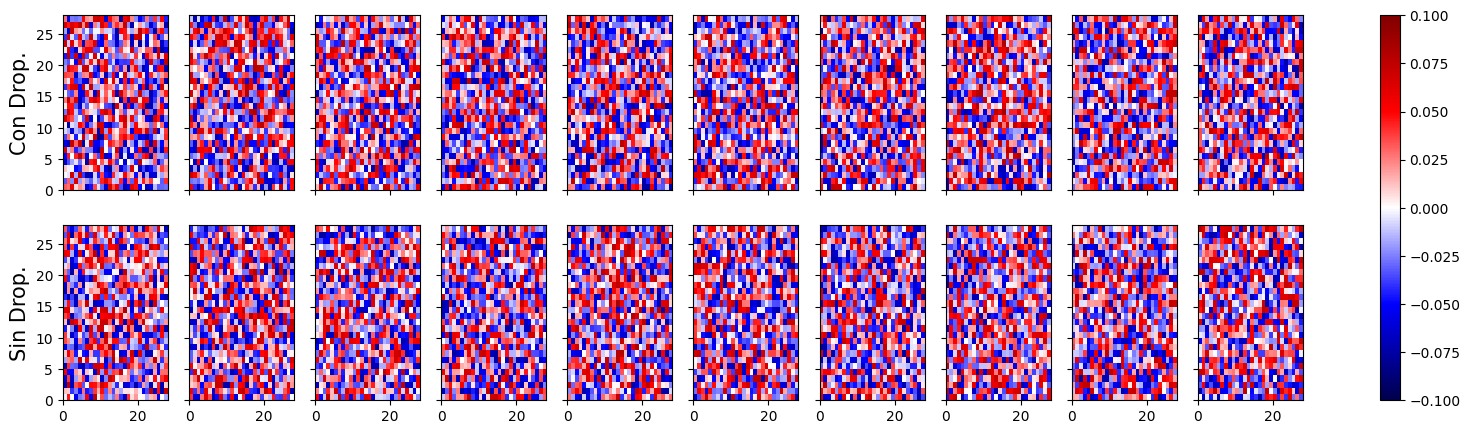

In [15]:
weights_con_dropout = model4.get_weights()[0]

weights_sin_dropout = model5.get_weights()[0]

weights_con_dropout = weights_con_dropout.reshape((28, 28, 256))
weights_sin_dropout = weights_sin_dropout.reshape((28, 28, 256))

fig, axs = plt.subplots(2, 10, figsize = (20, 5), sharex=True, sharey=True)
vmin = -0.1; vmax = 0.1

for i in range(10):
    a = axs[0, i].pcolormesh(weights_con_dropout[:,:,i], vmin = vmin, vmax = vmax, cmap = 'seismic')
    axs[1, i].pcolormesh(weights_sin_dropout[:,:,i], vmin = vmin, vmax = vmax, cmap = 'seismic')

axs[0, 0].set_ylabel('Con Drop.', fontsize = 15)
axs[1, 0].set_ylabel('Sin Drop.', fontsize = 15)

fig.colorbar(a, ax=axs, location='right')

En la figura anterior podemos ver la distribución de pesos de las 4 primeras neuronas (de izquierda a derecha), para una red con dropout (primera fila) y sin dropout (segunda fila). Observamos como la distribución de los pesos en el caso de una red sin dropout es más “aleatoria” mientras que en una red con dropout podemos ver como parece que cada neurona se ha centrado en una parte de la imagen. Esto es debido a que en las redes sin dropout las neuronas se han coadaptado para identificar un mismo rasgo, mientras que en una red con dropout no hay coadaptamiento, ya que las neuronas se han visto obligadas a aprender sin depender de la presencia de otras neuronas (por la propia naturaleza del dropout).

¿Por qué usar el optimizador "Adadelta"?

- Adaptabilidad de la tasa de aprendizaje: Adadelta es un optimizador adaptativo que ajusta automáticamente la tasa de aprendizaje durante el entrenamiento. Esto puede ser beneficioso en problemas de autoencoders, donde la topología de la red y la naturaleza de los datos pueden hacer que la tasa de aprendizaje óptima varíe durante el proceso de entrenamiento. Adadelta puede ayudar a abordar este problema ajustando la tasa de aprendizaje de forma adaptativa para diferentes partes del espacio de parámetros.

- Manejo de gradientes variables: En problemas de autoencoders, especialmente cuando se utilizan datos de alta dimensionalidad, los gradientes pueden variar considerablemente entre diferentes parámetros y muestras de datos. Adadelta tiene la capacidad de adaptarse a estas variaciones al actualizar los parámetros de forma individual según la magnitud de sus gradientes históricos, lo que puede mejorar la convergencia del entrenamiento.

- Menor sensibilidad a la elección de la tasa de aprendizaje inicial: Adadelta no requiere la especificación manual de una tasa de aprendizaje inicial, lo que puede simplificar el proceso de ajuste de hiperparámetros en comparación con otros optimizadores que dependen de la elección de la tasa de aprendizaje.

- Reducción de la necesidad de ajuste de hiperparámetros: Al ser un optimizador adaptativo, Adadelta puede reducir la necesidad de ajustar manualmente la tasa de aprendizaje durante el entrenamiento, lo que puede ahorrar tiempo y esfuerzo en el proceso de desarrollo del modelo.

### Batch normalization
Es muy común normalizar los datos de entrada antes de entrenar cualquier método de machine learning para evitar problemas de escala y además acelerar el aprendizaje. Al igual que escalamos los datos de entrada, es decir las neuronas de la capa de entrada, podríamos escalar las capas intermedias. Esto es lo que se conoce como batch normalization (más información en https://arxiv.org/pdf/1502.03167.pdf). Para implantarlo en KERAS se hace lo siguiente.

In [16]:
model6 = keras.Sequential()
model6.add(layers.Dense(units = 500, input_dim = 784, activation = "relu")) # Primera capa oculta
model6.add(layers.BatchNormalization())
model6.add(layers.Dense(units = 500, activation = "relu")) 
model6.add(layers.BatchNormalization())
model6.add(layers.Dense(units = 500 , activation = "relu")) 
model6.add(layers.BatchNormalization())
model6.add(layers.Dense(units = 500 , activation = "relu")) 
model6.add(layers.BatchNormalization())
model6.add(layers.Dense(units = 10 , activation = "softmax")) 

model6.compile(
  optimizer = keras.optimizers.SGD(0.1),
  loss = "mse",
  metrics = ["accuracy"]
)

history6 = model6.fit(x_train, y_train, epochs = 10, batch_size = 100, validation_split = 0.2)

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6769 - loss: 0.0421 - val_accuracy: 0.9278 - val_loss: 0.0112
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9340 - loss: 0.0103 - val_accuracy: 0.9440 - val_loss: 0.0084
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9566 - loss: 0.0072 - val_accuracy: 0.9515 - val_loss: 0.0072
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9675 - loss: 0.0055 - val_accuracy: 0.9565 - val_loss: 0.0065
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9751 - loss: 0.0044 - val_accuracy: 0.9592 - val_loss: 0.0062
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9787 - loss: 0.0038 - val_accuracy: 0.9627 - val_loss: 0.0058
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9823 - loss: 0.0033 - val_accuracy: 0.9635 - val_loss: 0.0056
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9862 - loss: 0.0027 - val_accuracy: 0.

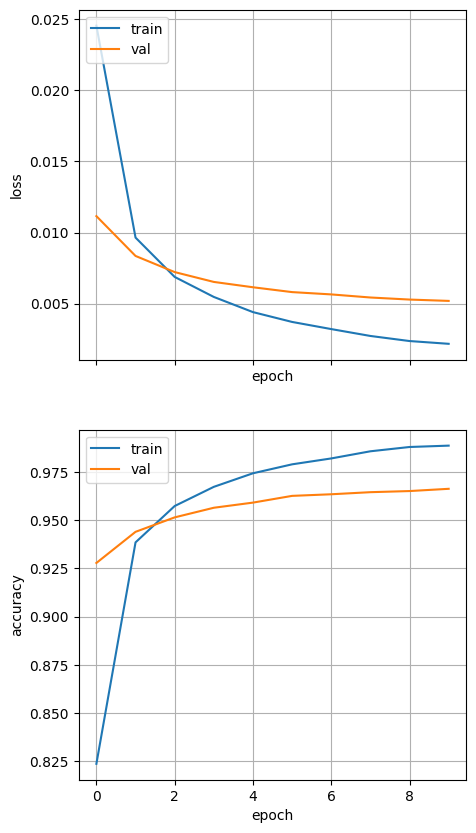

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=False, figsize = (5, 10))

ax1.plot(history6.history['loss'])
ax1.plot(history6.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid(True)

ax2.plot(history6.history['accuracy'])
ax2.plot(history6.history['val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
ax2.grid(True)

In [18]:
model7 = keras.Sequential()
model7.add(layers.Dense(units = 500, input_dim = 784, activation = "relu")) # Primera capa oculta
model7.add(layers.Dense(units = 500, activation = "relu")) 
model7.add(layers.Dense(units = 500 , activation = "relu")) 
model7.add(layers.Dense(units = 500 , activation = "relu")) 
model7.add(layers.Dense(units = 10 , activation = "softmax")) 

model7.compile(
  optimizer = keras.optimizers.SGD(0.1),
  loss = "mse",
  metrics = ["accuracy"]
)

history7 = model7.fit(x_train, y_train, epochs = 20, batch_size = 100, validation_split = 0.2)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2110 - loss: 0.0886 - val_accuracy: 0.3900 - val_loss: 0.0785
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5088 - loss: 0.0705 - val_accuracy: 0.8231 - val_loss: 0.0385
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8327 - loss: 0.0328 - val_accuracy: 0.8864 - val_loss: 0.0198
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8800 - loss: 0.0200 - val_accuracy: 0.9061 - val_loss: 0.0155
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8999 - loss: 0.0163 - val_accuracy: 0.9137 - val_loss: 0.0138
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9073 - loss: 0.0146 - val_accuracy: 0.9213 - val_loss: 0.0126
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9191 - loss: 0.0129 - val_accuracy: 0.9246 - val_loss: 0.0117
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9217 - loss: 0.0122 - val_accuracy: 0.

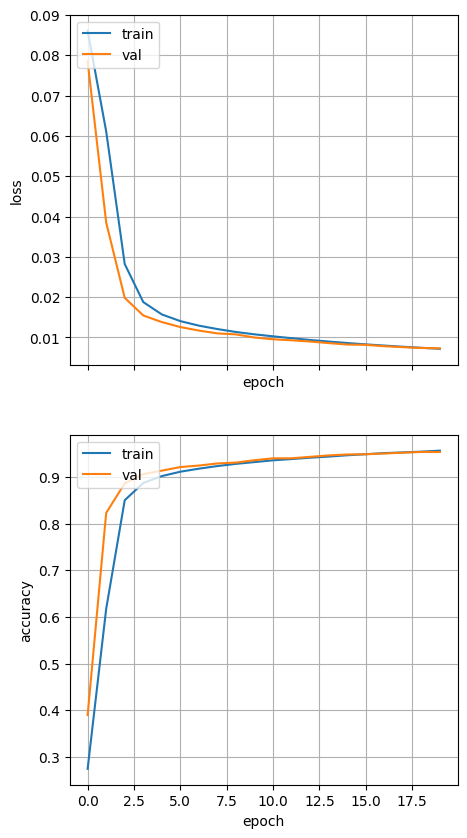

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=False, figsize = (5, 10))

ax1.plot(history7.history['loss'])
ax1.plot(history7.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid(True)

ax2.plot(history7.history['accuracy'])
ax2.plot(history7.history['val_accuracy'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'val'], loc='upper left')
ax2.grid(True)

Podemos ver como se alcanzan mayores eficiencias con batch normalization en épocas más tempranas. Como preveíamos, al incluir capas de normalización hemos acelerado el aprendizaje.

## GridSearchCV con Keras
Para realizar una búsqueda en cuadrícula con Keras, podemos programarla fácilmente de la siguiente manera. También existe la opción de utilizar la función GridSearch de sklearn, aunque con ella no es posible modificar todos los parámetros de entrada de Keras.

In [20]:
import itertools
from keras.optimizers import Adam, SGD

In [21]:
# Función para crear el modelo de Keras
def create_model(optimizer='sgd', learning_rate=0.01, n_layers=1, n_neurons=10):
    model = keras.Sequential()
        
    for _ in range(n_layers):
        model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Definir los parámetros a ajustar
params = {
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_layers': [1, 2, 3],
    'n_neurons': [20, 30, 50]
}

#GridSearch
param_combinations = list(itertools.product(*params.values()))


best_accuracy = 0

for combination in param_combinations:
    param_dict = dict(zip(params.keys(), combination))
    print(param_dict)
    
    # Compilar el modelo
    model = create_model(**param_dict)
    
    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=0)

    # Evaluar el modelo en el conjunto de prueba
    #y_pred = model.predict(x_test)
    m_eval = model.evaluate(x_test, y_test, batch_size=100)    
    accuracy = m_eval[1]

    # Actualizar el mejor modelo y los mejores parámetros si se obtiene un mejor rendimiento
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = param_dict
        
# Mostrar los mejores parámetros encontrados y la mejor precisión
print("Mejor combinación de parámetros encontrada: ", best_params)
print("Mejor precisión en el conjunto de prueba: ", best_accuracy)

{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 1, 'n_neurons': 20}
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.9553 - loss: 0.1575
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 1, 'n_neurons': 30}
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9611 - loss: 0.1363
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 1, 'n_neurons': 50}
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.9703 - loss: 0.1101
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 2, 'n_neurons': 20}
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9527 - loss: 0.1666
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 2, 'n_neurons': 30}
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9636 - loss: 0.1444
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 2, 'n_neurons': 50}
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9719 - loss: 0.1246
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 3, 'n_neuron

## Diseña una arquitectura original para los datos de PIMA-Indian-Diabetes. Realiza un búsqueda en cuadrícula y encuentra los mejores hiperparámetros.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
diabetes = pd.read_csv('diabetes.csv')

In [25]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
# Separar características y etiquetas
x = diabetes.values[:,0:-1]  # características
y = diabetes['Outcome'].values.reshape(len(diabetes['Outcome']), 1) # etiquetas

# Normalizar las características
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [27]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
# Función para crear el modelo de K
def create_model(optimizer='adam', learning_rate=0.01, n_layers=1, n_neurons=10):
    model = keras.Sequential()
        
    for _ in range(n_layers):
        model.add(layers.Dense(n_neurons, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Definir los parámetros a ajustar
params = {
    'optimizer': ['adam', 'sgd'],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_layers': [1, 2, 3],
    'n_neurons': [20, 30, 50]
}

#GridSearch
param_combinations = list(itertools.product(*params.values()))

best_accuracy = 0

for combination in param_combinations:
    param_dict = dict(zip(params.keys(), combination))
    print(param_dict)
    
    # Compilar el modelo
    model = create_model(**param_dict)
    
    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=20, batch_size=100, verbose=0)

    # Evaluar el modelo en el conjunto de prueba
    m_eval = model.evaluate(x_test, y_test, batch_size=100)    
    accuracy = m_eval[1]

    # Actualizar el mejor modelo y los mejores parámetros si se obtiene un mejor rendimiento
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = param_dict

# Mostrar los mejores parámetros encontrados y la mejor precisión
print("Mejor combinación de parámetros encontrada: ", best_params)
print("Mejor precisión en el conjunto de prueba: ", best_accuracy)

{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 1, 'n_neurons': 20}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7458 - loss: 0.5346 
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 1, 'n_neurons': 30}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7645 - loss: 0.4983 
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 1, 'n_neurons': 50}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7885 - loss: 0.4598 
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 2, 'n_neurons': 20}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7765 - loss: 0.4662 
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 2, 'n_neurons': 30}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8071 - loss: 0.4523 
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 2, 'n_neurons': 50}
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7995 - loss: 0.4541 
{'optimizer': 'adam', 'learning_rate': 0.001, 'n_layers': 3, 'n_neurons': 20}
2/2 ━━━━━━━━━━━━━━━━━━